In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.2 MB/s eta 0:00:00


In [3]:
train_data = pd.read_csv("fraudTrain.csv")

In [4]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,256039.000000,2.560390e+05,256039.000000,256039.000000,256039.000000,256039.000000,2.560390e+05,2.560390e+05,256038.000000,256038.000000,256038.000000
mean,128019.000000,4.156386e+17,70.964305,48792.236886,38.537240,-90.210362,8.973082e+04,1.331275e+09,38.537645,-90.210292,0.007694
std,73912.237124,1.306570e+18,159.783151,26883.127347,5.073884,13.749241,3.039479e+05,4.099898e+06,5.108362,13.761503,0.087378
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.000000e+00,19.029798,-166.671242,0.000000
25%,64009.500000,1.800365e+14,9.660000,26237.000000,34.668900,-96.798000,7.430000e+02,1.328624e+09,34.740184,-96.878435,0.000000
50%,128019.000000,3.519607e+15,47.670000,48174.000000,39.354300,-87.461600,2.457000e+03,1.331486e+09,39.355756,-87.421360,0.000000
75%,192028.500000,4.642255e+15,83.370000,72011.000000,41.894800,-80.158000,2.112500e+04,1.333922e+09,41.955420,-80.222743,0.000000
max,256038.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.336387e+09,67.510267,-66.956540,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256039 entries, 0 to 256038
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             256039 non-null  int64  
 1   trans_date_trans_time  256039 non-null  object 
 2   cc_num                 256039 non-null  int64  
 3   merchant               256039 non-null  object 
 4   category               256039 non-null  object 
 5   amt                    256039 non-null  float64
 6   first                  256039 non-null  object 
 7   last                   256039 non-null  object 
 8   gender                 256039 non-null  object 
 9   street                 256039 non-null  object 
 10  city                   256039 non-null  object 
 11  state                  256039 non-null  object 
 12  zip                    256039 non-null  int64  
 13  lat                    256039 non-null  float64
 14  long                   256039 non-nu

In [6]:
train_data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [7]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

**PREPROCESSING**

In [8]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data['dob'] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256034,256034,2019-05-07 10:37:23,30029052116970,fraud_Brown PLC,misc_net,3.03,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,091dee71462ba81546574d622229e0b3,1336387043,42.286194,-78.302016,0.0
256035,256035,2019-05-07 10:38:46,4383521454815,"fraud_Goldner, Kovacek and Abbott",grocery_pos,104.33,John,Robertson,M,209 Austin Stream Apt. 231,...,39.9347,-86.1633,910148,Academic librarian,1987-09-22,06abc4c014421668b903fb51d01e71fe,1336387126,40.320885,-85.628470,0.0
256036,256036,2019-05-07 10:39:20,374238209524200,fraud_Stoltenberg-Beatty,shopping_pos,8.47,Daniel,Martinez,M,8510 Acevedo Burgs,...,45.0838,-120.6649,60,Museum education officer,1942-04-03,6e1b10061004a5a1fdfc11b5a823e5ae,1336387160,45.508293,-121.493049,0.0
256037,256037,2019-05-07 10:44:16,6596735789587928,fraud_Kiehn-Emmerich,grocery_pos,50.27,Spencer,Williams,M,1145 Tony Drive Suite 080,...,44.9595,-93.8482,5619,Licensed conveyancer,1959-01-15,469c158593b73a10fbb165af28b983d7,1336387456,44.982592,-93.858606,0.0


In [9]:
train_data.drop(columns=['Unnamed: 0','cc_num','first','last','street','city','state','zip','dob','trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256034,fraud_Brown PLC,misc_net,3.03,M,42.1239,-79.1895,3833,Metallurgist,1336387043,42.286194,-78.302016,0.0
256035,"fraud_Goldner, Kovacek and Abbott",grocery_pos,104.33,M,39.9347,-86.1633,910148,Academic librarian,1336387126,40.320885,-85.628470,0.0
256036,fraud_Stoltenberg-Beatty,shopping_pos,8.47,M,45.0838,-120.6649,60,Museum education officer,1336387160,45.508293,-121.493049,0.0
256037,fraud_Kiehn-Emmerich,grocery_pos,50.27,M,44.9595,-93.8482,5619,Licensed conveyancer,1336387456,44.982592,-93.858606,0.0


In [10]:
#Drop all rows contain missing value
train_data = train_data.dropna(ignore_index=True)

In [11]:
#Handle categoric values
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data['category'] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data['job'] = encoder.fit_transform(train_data['job'])


/tmp/ipython-input-1761283535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
/tmp/ipython-input-1761283535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['category'] = encoder.fit_transform(train_data["category"])
/tmp/ipython-input-1761283535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [12]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,360,1325376018,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149,416,1325376044,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154,298,1325376051,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939,319,1325376076,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99,113,1325376186,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256033,414,9,2.47,1,40.6267,-96.7456,142,79,1336387032,41.369271,-96.267702,0.0
256034,79,8,3.03,1,42.1239,-79.1895,3833,287,1336387043,42.286194,-78.302016,0.0
256035,194,4,104.33,1,39.9347,-86.1633,910148,0,1336387126,40.320885,-85.628470,0.0
256036,601,12,8.47,1,45.0838,-120.6649,60,292,1336387160,45.508293,-121.493049,0.0


**EXPLORITY DATA ANALYSIS**

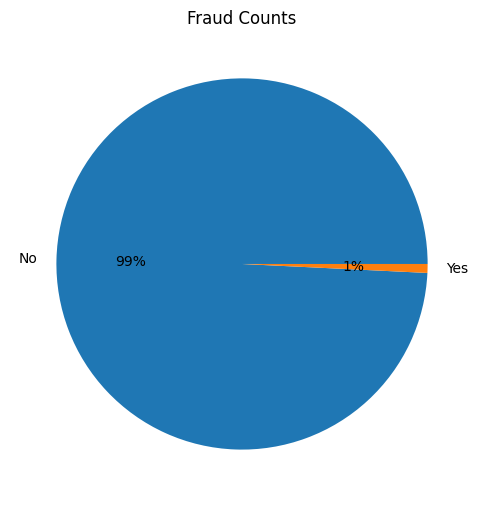

In [13]:
counts=train_data['is_fraud'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(counts, labels=["No", "Yes"], autopct="%.0f%%")
plt.title("Fraud Counts")
plt.tight_layout() #automatically adjust subplot parameters
plt.show()


**SMOTE IMBALANCED DATA**

In [14]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(train_data.drop(columns=["is_fraud"]), train_data["is_fraud"])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 9.5 MB/s eta 0:00:00


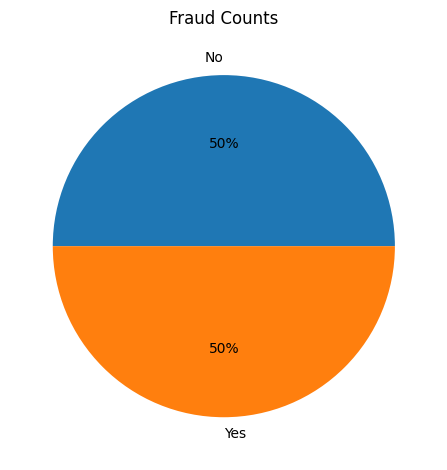

In [15]:
plt.pie(y_smote.value_counts(), labels=["No", "Yes"], autopct="%.0f%%")
plt.title("Fraud Counts")
plt.tight_layout() #automatically adjust subplot parameters
plt.show()

**MODEL TRAIN**

In [16]:
X_train = train_data.drop(columns=["is_fraud"], inplace = False)
y_train = train_data["is_fraud"]

In [17]:
X_train

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,514,8,4.97,0,36.0788,-81.1781,3495,360,1325376018,36.011293,-82.048315
1,241,4,107.23,0,48.8878,-118.2105,149,416,1325376044,49.159047,-118.186462
2,390,0,220.11,1,42.1808,-112.2620,4154,298,1325376051,43.150704,-112.154481
3,360,2,45.00,1,46.2306,-112.1138,1939,319,1325376076,47.034331,-112.561071
4,297,9,41.96,1,38.4207,-79.4629,99,113,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
256033,414,9,2.47,1,40.6267,-96.7456,142,79,1336387032,41.369271,-96.267702
256034,79,8,3.03,1,42.1239,-79.1895,3833,287,1336387043,42.286194,-78.302016
256035,194,4,104.33,1,39.9347,-86.1633,910148,0,1336387126,40.320885,-85.628470
256036,601,12,8.47,1,45.0838,-120.6649,60,292,1336387160,45.508293,-121.493049


**MODEL SELECTION**

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

svm_model = SVC()
svm_model.fit(X_train,y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**TEST MODEL**

In [20]:
test_data = pd.read_csv("fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [21]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [22]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [23]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


In [24]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
y_test = test_data["is_fraud"]

**SELECT BEST MODEL**

In [33]:
model_performance = pd.DataFrame(columns=["Model", "Accuracy"])

logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
model_performance.loc[len(model_performance)] = {"Model": "Logistic Regression", "Accuracy": logistic_accuracy}

svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
model_performance.loc[len(model_performance)] = {"Model": "SVM", "Accuracy": svm_accuracy}

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
model_performance.loc[len(model_performance)] = {"Model": "Decision Tree", "Accuracy": dt_accuracy}

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
model_performance.loc[len(model_performance)] = {"Model": "Random Forest", "Accuracy": rf_accuracy}

xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
model_performance.loc[len(model_performance)] = {"Model": "XGBoost", "Accuracy": xgb_accuracy}

print(model_performance)

best_model = model_performance.loc[model_performance['Accuracy'].idxmax()]
print(f"Best model is: {best_model}")

                 Model  Accuracy
0  Logistic Regression  0.995260
1                  SVM  0.996140
2        Decision Tree  0.969267
3        Random Forest  0.997240
4              XGBoost  0.996909
Best model is: Model       Random Forest
Accuracy          0.99724
Name: 3, dtype: object
